In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# Setting the path
path = r'C:\Users\Bhati\OneDrive\Desktop\CF\Data Analytics Immersion\Achievement 6\25-May-2023 Germany Rent Analysis'

In [3]:
# Importing the final cleaned file
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'Final_cleaned_state.csv'))

In [4]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.
%matplotlib inline

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146820 entries, 0 to 146819
Data columns (total 35 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Unnamed: 0.1        146820 non-null  int64  
 1   Unnamed: 0          146820 non-null  int64  
 2   State               146820 non-null  object 
 3   Maintenance_fee     146820 non-null  float64
 4   Heating_type        129593 non-null  object 
 5   TV_offer            129384 non-null  object 
 6   Newly_built         146820 non-null  bool   
 7   Balcony             146820 non-null  bool   
 8   Picture_count       146820 non-null  int64  
 9   Price_trend         145706 non-null  float64
 10  Internet_speed      129035 non-null  float64
 11  Total_Rent          146820 non-null  float64
 12  Year_constructed    146820 non-null  float64
 13  Energy_Source       128539 non-null  object 
 14  Kitchen             146820 non-null  bool   
 15  Cellar              146820 non-nul

In [6]:
df['House_Age'] = 2020 - df['Year_constructed']

In [7]:
# Creating Subset of Numerical Values
df_new = df[['Maintenance_fee', 'Total_Rent', 'Year_constructed', 'House_Age','Base_rent', 'Area(m2)', 'Rooms', 'Floor']]

## The Elbow Technique

In [8]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i, n_init=10) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [9]:
score = [kmeans[i].fit(df_new).score(df_new) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-68156380713.34691,
 -25141904627.27252,
 -13755562823.968924,
 -8611766174.879354,
 -6211798184.282434,
 -4809712449.873604,
 -3937136529.4371243,
 -3344991003.636564,
 -2915211881.4040008]

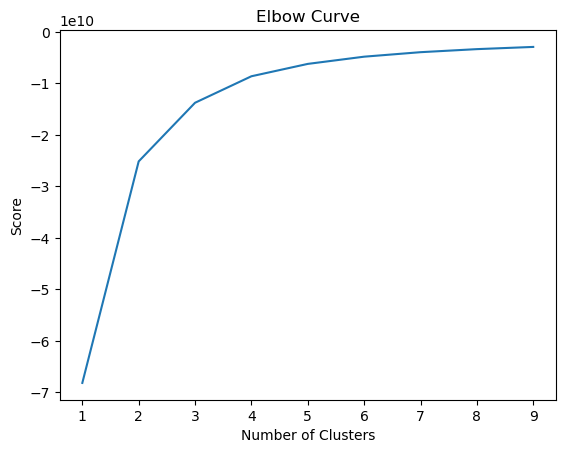

In [10]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#####  there's a  jump from 1 to 3 on the x-axis, but after that, the curve straightens out. This means that the optimal count for the clusters is 3.

## k-means clustering

In [11]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3, n_init=10)

In [12]:
# Fit the k-means object to the data.

kmeans.fit(df_new)

KMeans(n_clusters=3, n_init=10)

In [13]:
df_new['clusters'] = kmeans.fit_predict(df_new)

C:\Users\Bhati\AppData\Local\Temp\ipykernel_20676\316427919.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['clusters'] = kmeans.fit_predict(df_new)


In [14]:
df_new['clusters'].value_counts()

0    99787
1    38864
2     8169
Name: clusters, dtype: int64

### All States of Germany

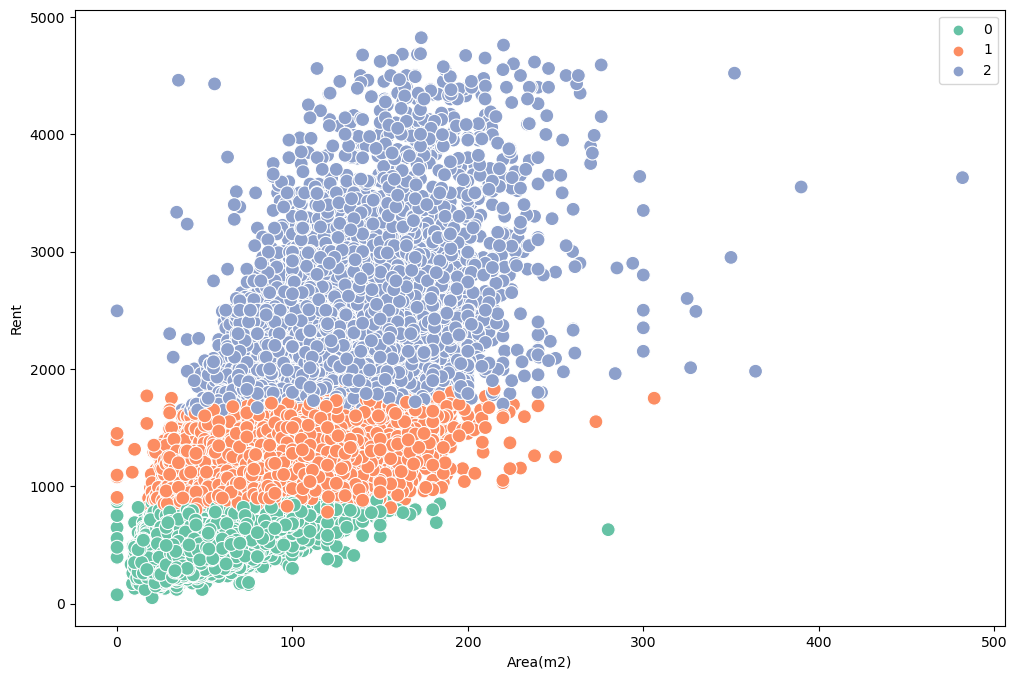

In [15]:
# Plot the clusters for the "Total_Rent" and "Area(m2)" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Area(m2)'], y=df['Total_Rent'], hue=kmeans.labels_, s=100, palette='Set2') 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points we want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Area(m2)') # Label x-axis.
plt.ylabel('Rent') # Label y-axis.
plt.show()

There does seem to be correlation between Area and Rent.

Text(0, 0.5, 'Rent')

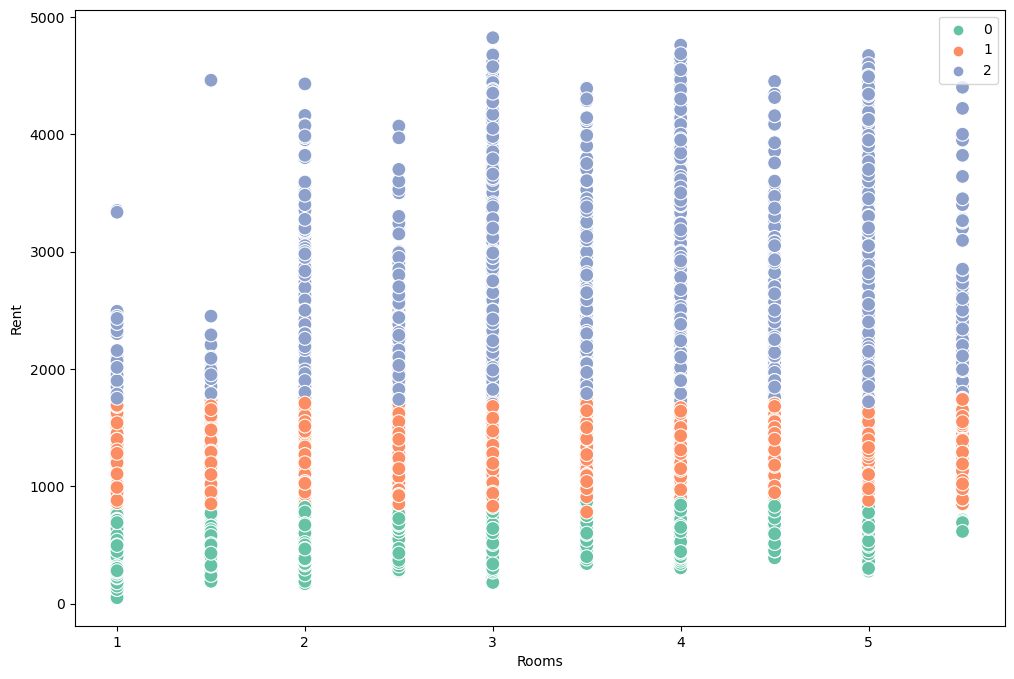

In [16]:
# Plot the clusters for the "Rooms" and "Total_Rent" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Rooms'], y=df['Total_Rent'], hue=kmeans.labels_, s=100, palette='Set2')

ax.grid(False) 
plt.xlabel('Rooms') 
plt.ylabel('Rent') 

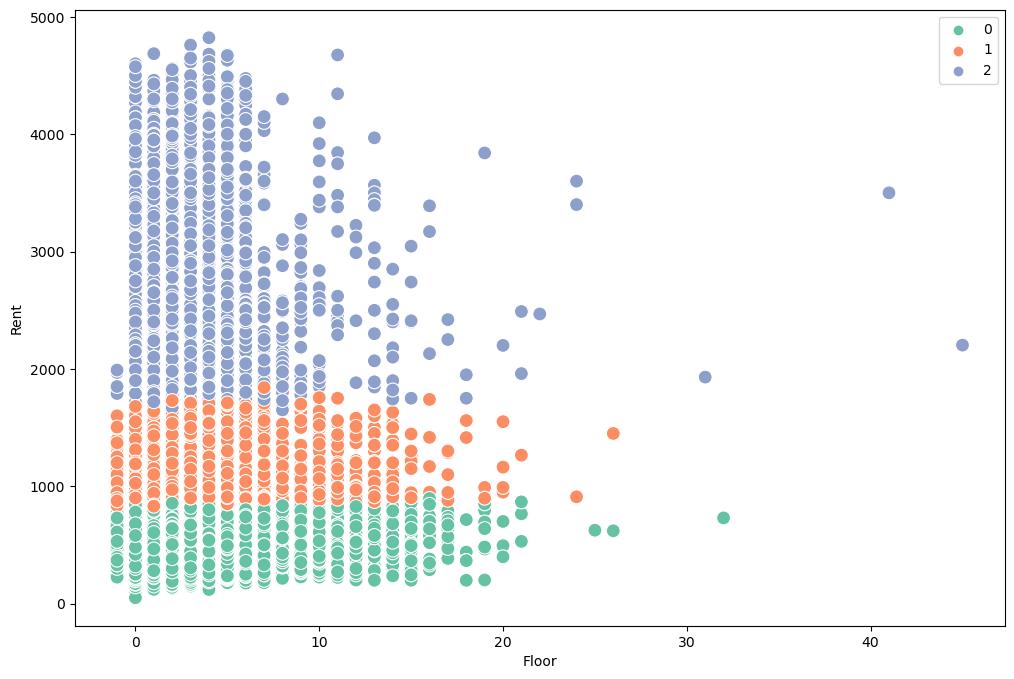

In [17]:
# Plot the clusters for the "Floor" and "Total_Rent" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Floor'], y=df['Total_Rent'], hue=kmeans.labels_, s=100, palette='Set2')

ax.grid(False) 
plt.xlabel('Floor') 
plt.ylabel('Rent') 
plt.show()

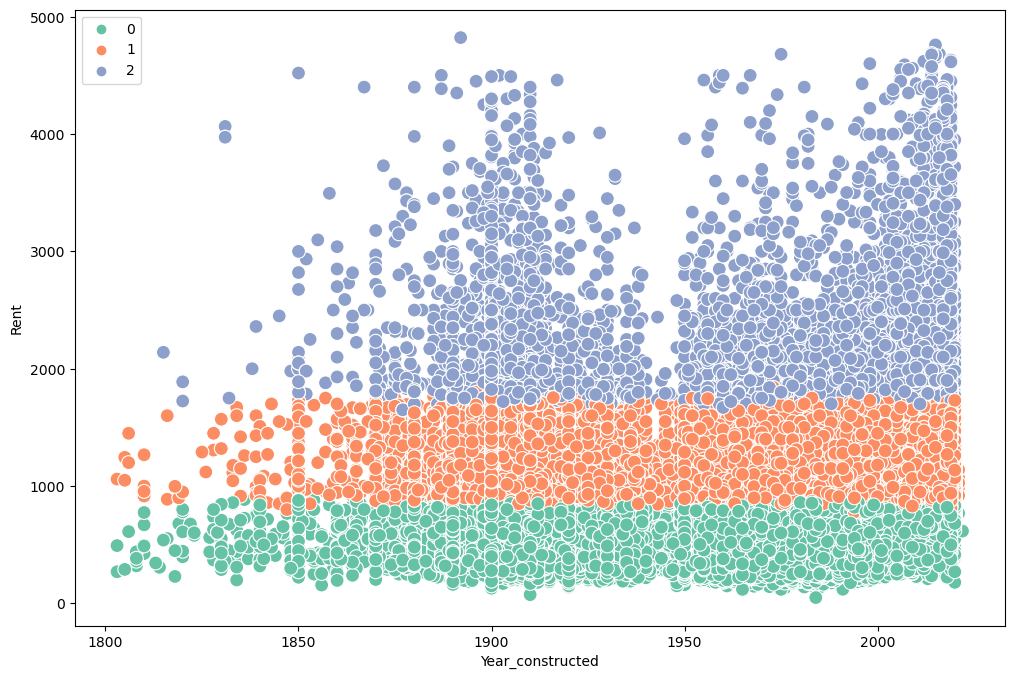

In [18]:
# Plot the clusters for the "Year_constructed" and "Total_Rent" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Year_constructed'], y=df['Total_Rent'], hue=kmeans.labels_, s=100, palette='Set2')

ax.grid(False) 
plt.xlabel('Year_constructed') 
plt.ylabel('Rent') 
plt.show()

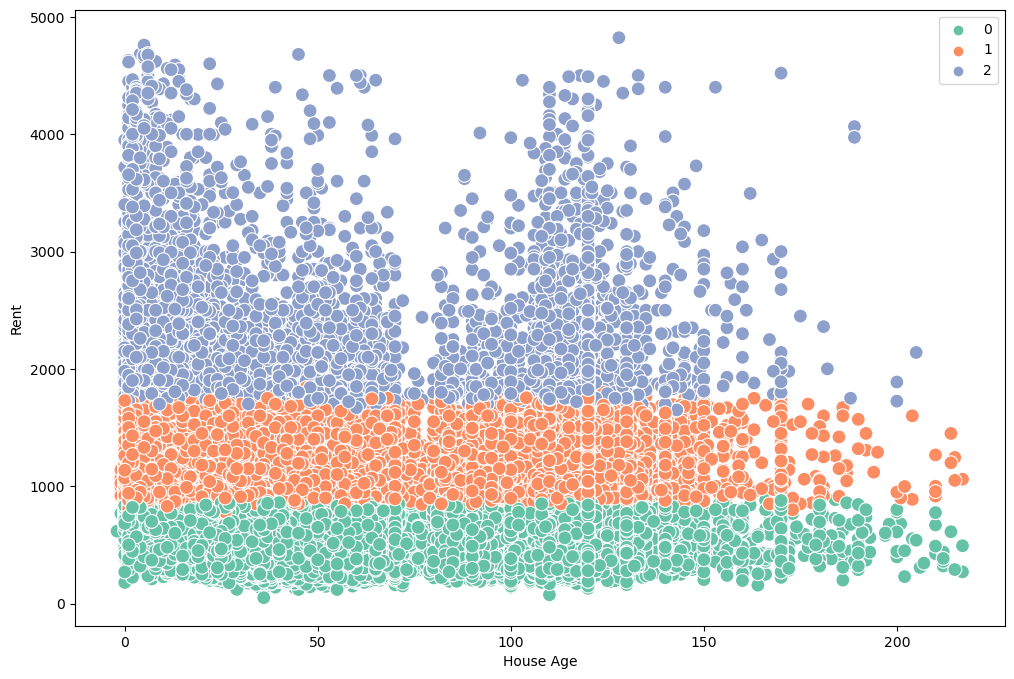

In [19]:
# Plot the clusters for the "House_Age" and "Total_Rent" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['House_Age'], y=df['Total_Rent'], hue=kmeans.labels_, s=100, palette='Set2')

ax.grid(False) 
plt.xlabel('House Age') 
plt.ylabel('Rent') 
plt.show()

In [20]:
df_new.loc[df_new['clusters'] == 0, 'clusters'] = 'Green'
df_new.loc[df_new['clusters'] == 1, 'clusters'] = 'Orange'
df_new.loc[df_new['clusters'] == 2, 'clusters'] = 'Blue'

1 (Orange) is the biggest Bucket

In [21]:
df_new.groupby('clusters').agg({'Floor':['mean', 'median'], 
                         'Rooms':['mean', 'median'], 
                         'Area(m2)':['mean', 'median'],
                         'Year_constructed':['mean', 'median'],
                         'House_Age':['mean', 'median'],
                         'Total_Rent':['mean', 'median']})

Floor            Rooms           Area(m2)           \
              mean median      mean median        mean   median   
clusters                                                          
Blue      2.607908    2.0  3.538438    3.5  126.080457  123.000   
Green     2.180484    2.0  2.377399    2.0   60.083798   60.000   
Orange    1.942415    2.0  2.996938    3.0   90.485136   88.815   

         Year_constructed          House_Age          Total_Rent           
                     mean  median       mean median         mean   median  
clusters                                                                   
Blue          1982.847350  2010.0  37.152650   10.0  2270.871239  2080.00  
Green         1959.906771  1967.0  60.093229   53.0   535.844428   518.15  
Orange        1981.106242  1994.0  38.893758   26.0  1175.223876  1129.00

#### The biggest bucket here has a rent of 1129, but do have clusters with as high 2080 rent and 518 as Rent. Hence would deepdive basis State Level Clustering

### Hamburg

State with highest average rent in Germany

In [22]:
# Creating Subset
Hamburg = df[df['State'].str.contains('Hamburg')]

In [23]:
# Creating Subset of Numerical Values
df_new2 = Hamburg[['Maintenance_fee', 'Total_Rent', 'Year_constructed', 'House_Age','Base_rent', 'Area(m2)', 'Rooms', 'Floor']]

In [24]:
# Fit the k-means object to the data.

kmeans.fit(df_new2)

KMeans(n_clusters=3, n_init=10)

In [25]:
df_new2['clusters'] = kmeans.fit_predict(df_new2)

C:\Users\Bhati\AppData\Local\Temp\ipykernel_20676\2549383008.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new2['clusters'] = kmeans.fit_predict(df_new2)


In [26]:
df_new2['clusters'].value_counts()

1    1127
0     801
2     241
Name: clusters, dtype: int64

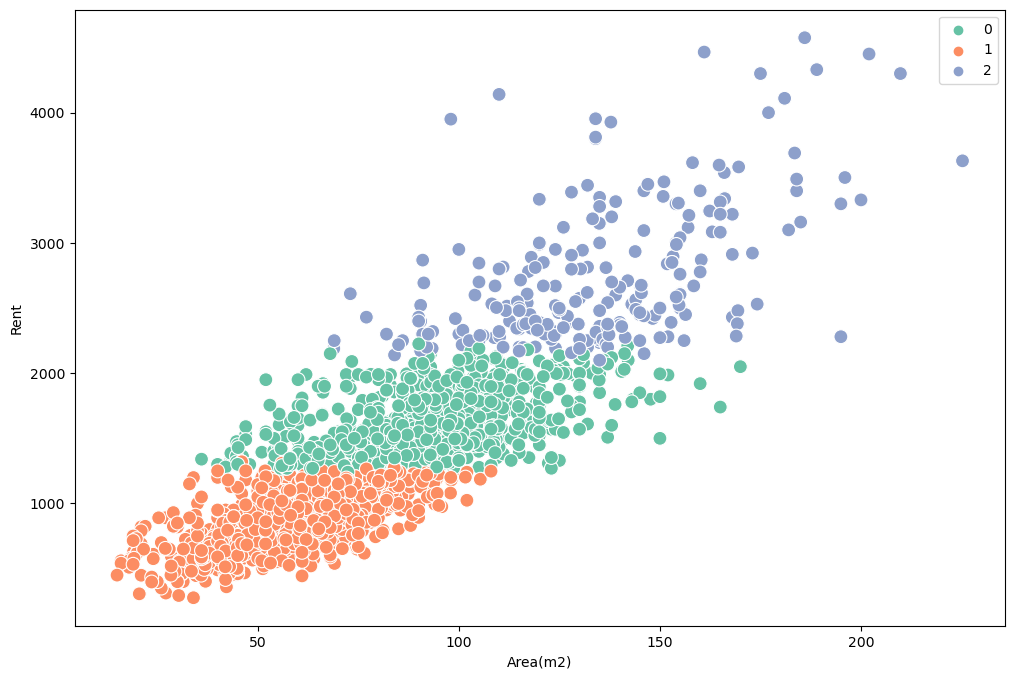

In [27]:
# Plot the clusters for the "Total_Rent" and "Area(m2)" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=Hamburg['Area(m2)'], y=Hamburg['Total_Rent'], hue=kmeans.labels_, s=100, palette='Set2') 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points we want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Area(m2)') # Label x-axis.
plt.ylabel('Rent') # Label y-axis.
plt.show()

Text(0, 0.5, 'Rent')

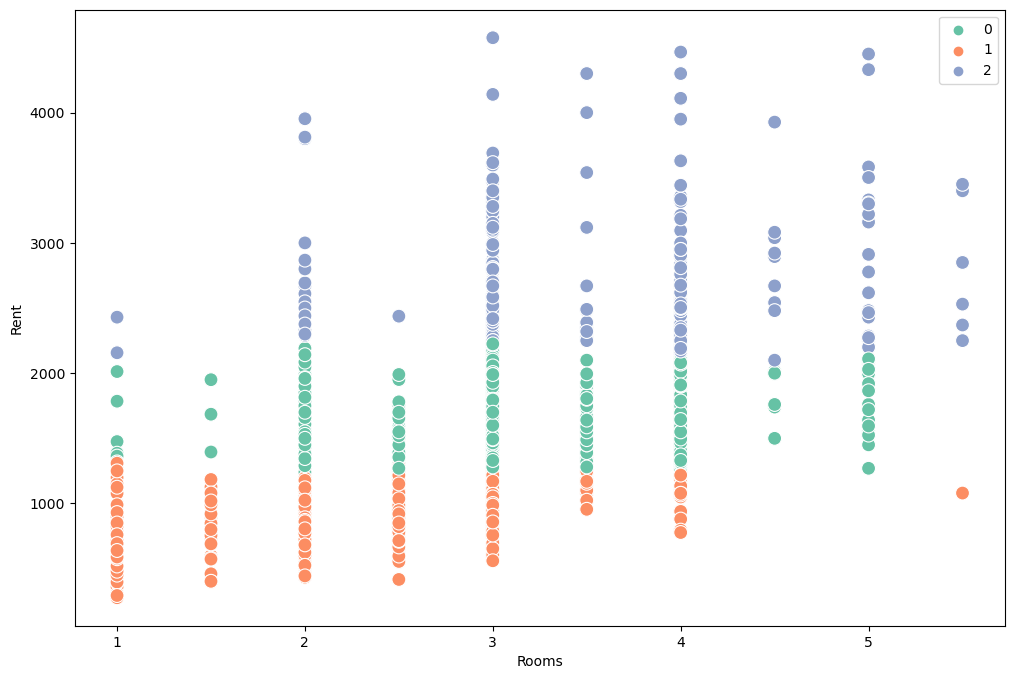

In [28]:
# Plot the clusters for the "Rooms" and "Total_Rent" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=Hamburg['Rooms'], y=Hamburg['Total_Rent'], hue=kmeans.labels_, s=100, palette='Set2')

ax.grid(False) 
plt.xlabel('Rooms') 
plt.ylabel('Rent') 

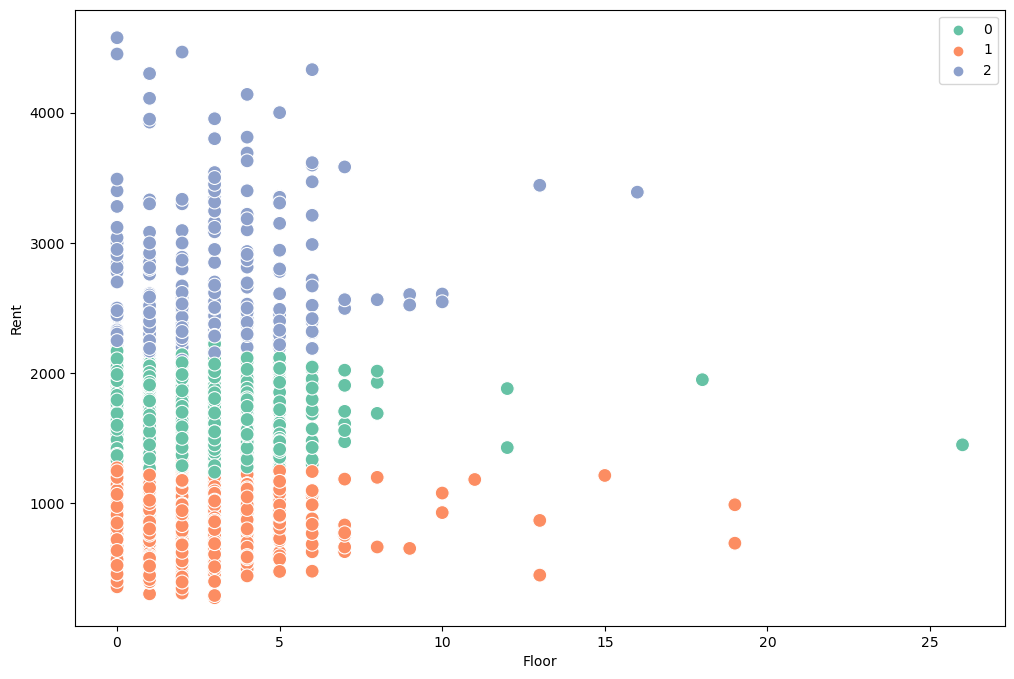

In [29]:
# Plot the clusters for the "Floor" and "Total_Rent" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=Hamburg['Floor'], y=Hamburg['Total_Rent'], hue=kmeans.labels_, s=100, palette='Set2')

ax.grid(False) 
plt.xlabel('Floor') 
plt.ylabel('Rent') 
plt.show()

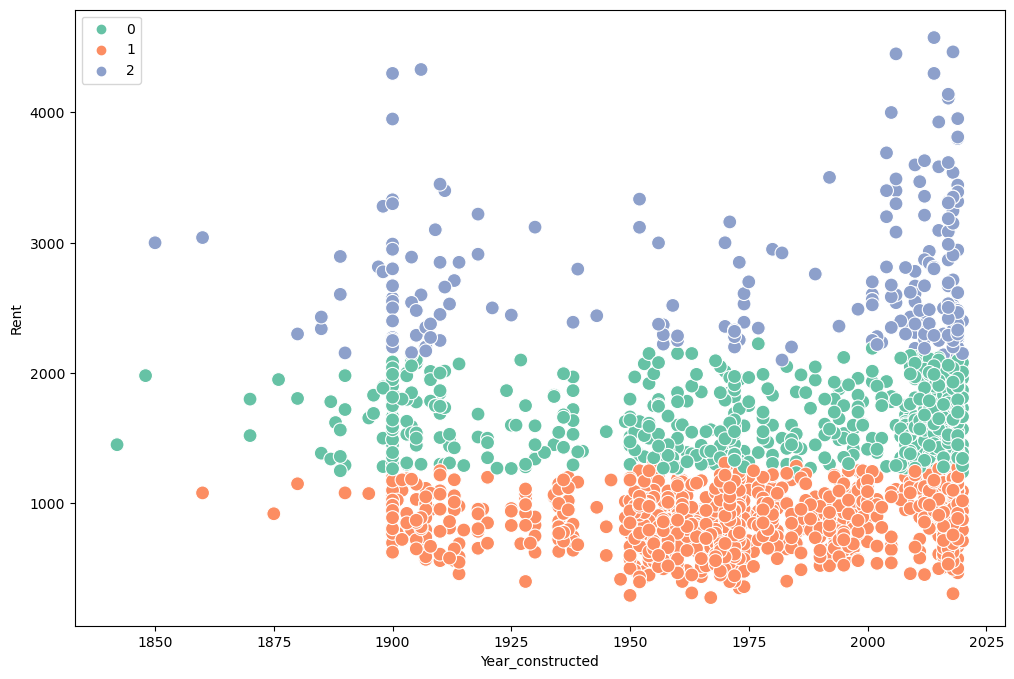

In [30]:
# Plot the clusters for the "Year_constructed" and "Total_Rent" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=Hamburg['Year_constructed'], y=Hamburg['Total_Rent'], hue=kmeans.labels_, s=100, palette='Set2')

ax.grid(False) 
plt.xlabel('Year_constructed') 
plt.ylabel('Rent') 
plt.show()

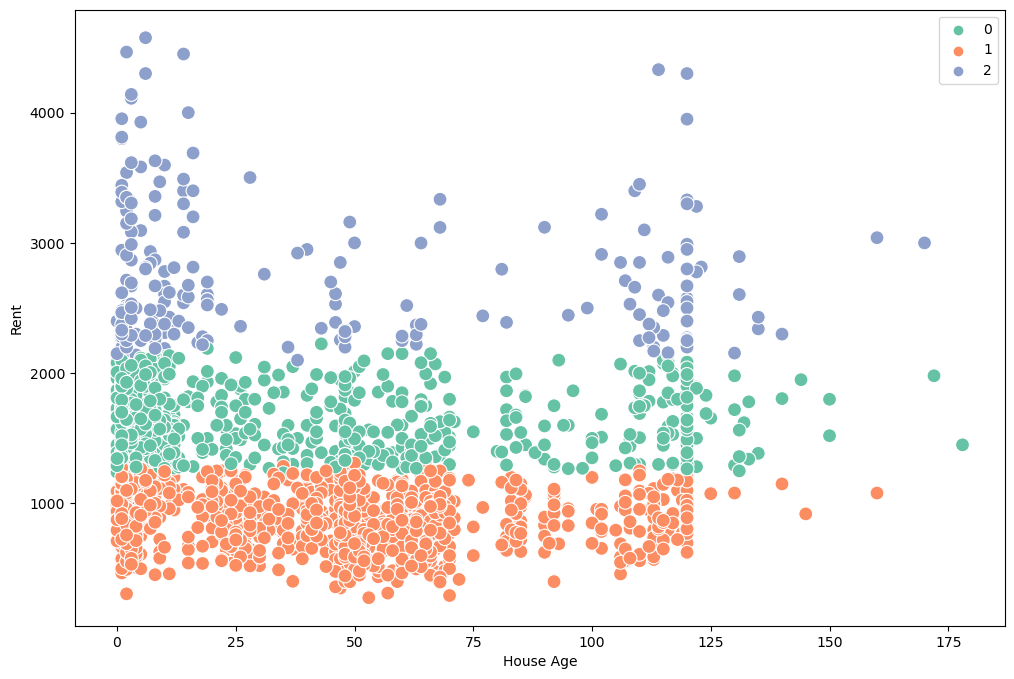

In [31]:
# Plot the clusters for the "House_Age" and "Total_Rent" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=Hamburg['House_Age'], y=Hamburg['Total_Rent'], hue=kmeans.labels_, s=100, palette='Set2')

ax.grid(False) 
plt.xlabel('House Age') 
plt.ylabel('Rent') 
plt.show()

In [32]:
df_new2.loc[df_new2['clusters'] == 0, 'clusters'] = 'Green'
df_new2.loc[df_new2['clusters'] == 1, 'clusters'] = 'Orange'
df_new2.loc[df_new2['clusters'] == 2, 'clusters'] = 'Blue'

0 (Green) is the biggest bucket for Hamburg

In [33]:
df_new2.groupby('clusters').agg({'Floor':['mean', 'median'], 
                         'Rooms':['mean', 'median'], 
                         'Area(m2)':['mean', 'median'],
                         'Year_constructed':['mean', 'median'],
                         'House_Age':['mean', 'median'],
                         'Total_Rent':['mean', 'median']})

Floor            Rooms           Area(m2)          \
              mean median      mean median        mean  median   
clusters                                                         
Blue      2.892116    2.0  3.502075    3.0  134.138382  134.00   
Green     2.204744    2.0  2.994382    3.0   92.362821   91.62   
Orange    2.003549    2.0  2.144632    2.0   59.502848   60.00   

         Year_constructed          House_Age          Total_Rent          
                     mean  median       mean median         mean  median  
clusters                                                                  
Blue          1979.082988  2006.0  40.917012   14.0  2732.062324  2540.0  
Green         1986.823970  2010.0  33.176030   10.0  1609.699438  1568.0  
Orange        1974.710736  1972.0  45.289264   48.0   884.990559   893.0

#### Median rent for biggest cluster is 894.23 in Hamburg. Houses are newly built with median house age as 10. The souse size of biggest cluster is 91.62

### Sachsen_Anhalt

State with lowest average rent in Germany

In [36]:
# Creating Subset
Sachsen = df[df['State'].str.contains('Sachsen_Anhalt')]

In [37]:
# Creating Subset of Numerical Values
df_new3 = Sachsen[['Maintenance_fee', 'Total_Rent', 'Year_constructed', 'House_Age','Base_rent', 'Area(m2)', 'Rooms', 'Floor']]

In [38]:
# Fit the k-means object to the data.

kmeans.fit(df_new3)

KMeans(n_clusters=3, n_init=10)

In [39]:
df_new3['clusters'] = kmeans.fit_predict(df_new3)

C:\Users\Bhati\AppData\Local\Temp\ipykernel_20676\883318226.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new3['clusters'] = kmeans.fit_predict(df_new3)


In [40]:
df_new3['clusters'].value_counts()

1    9755
0    2498
2     308
Name: clusters, dtype: int64

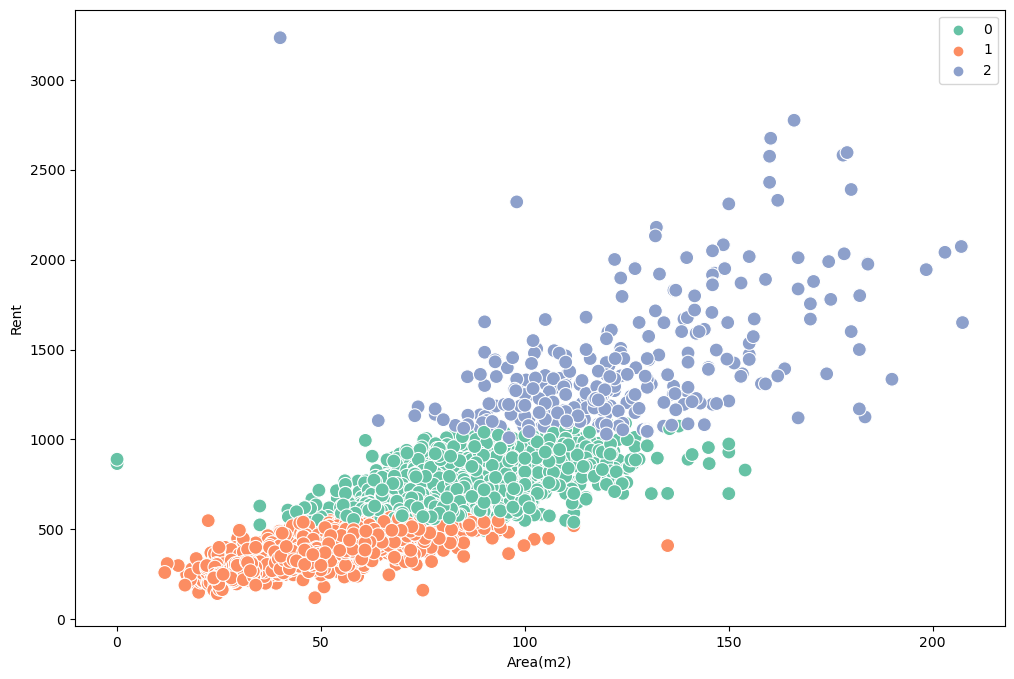

In [41]:
# Plot the clusters for the "Total_Rent" and "Area(m2)" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=Sachsen['Area(m2)'], y=Sachsen['Total_Rent'], hue=kmeans.labels_, s=100, palette='Set2') 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points we want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Area(m2)') # Label x-axis.
plt.ylabel('Rent') # Label y-axis.
plt.show()

Text(0, 0.5, 'Rent')

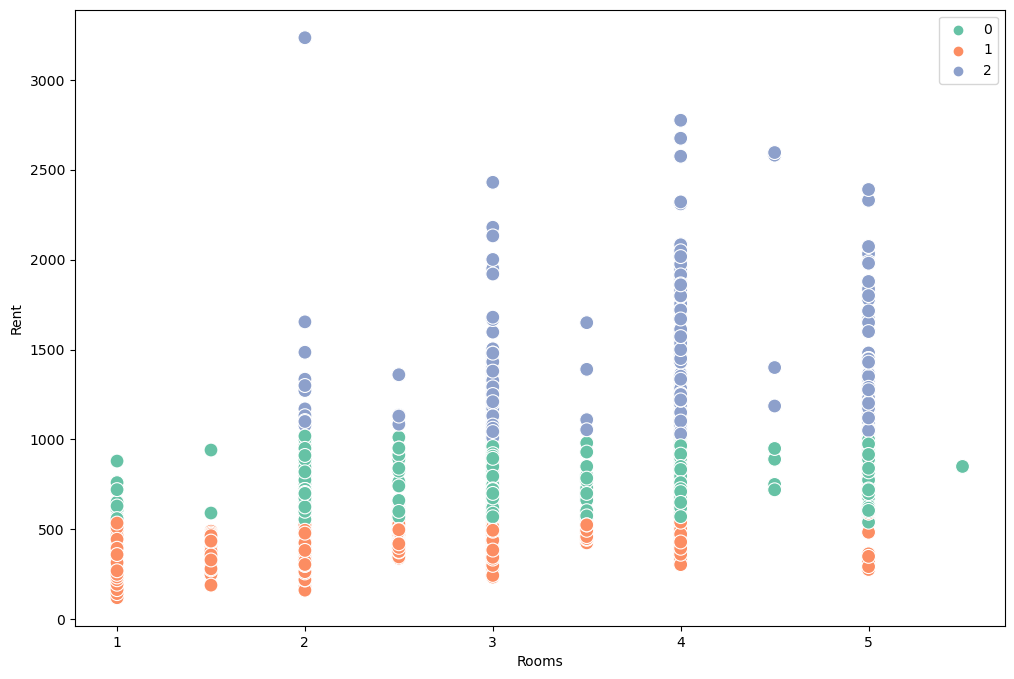

In [42]:
# Plot the clusters for the "Rooms" and "Total_Rent" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=Sachsen['Rooms'], y=Sachsen['Total_Rent'], hue=kmeans.labels_, s=100, palette='Set2')

ax.grid(False) 
plt.xlabel('Rooms') 
plt.ylabel('Rent') 

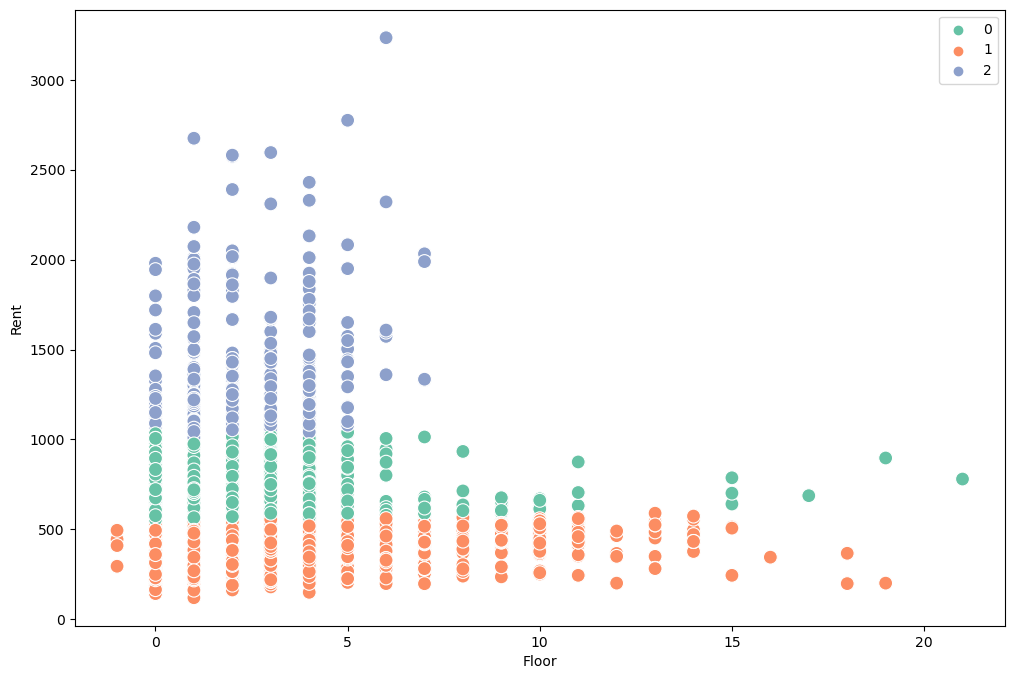

In [43]:
# Plot the clusters for the "Floor" and "Total_Rent" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=Sachsen['Floor'], y=Sachsen['Total_Rent'], hue=kmeans.labels_, s=100, palette='Set2')

ax.grid(False) 
plt.xlabel('Floor') 
plt.ylabel('Rent') 
plt.show()

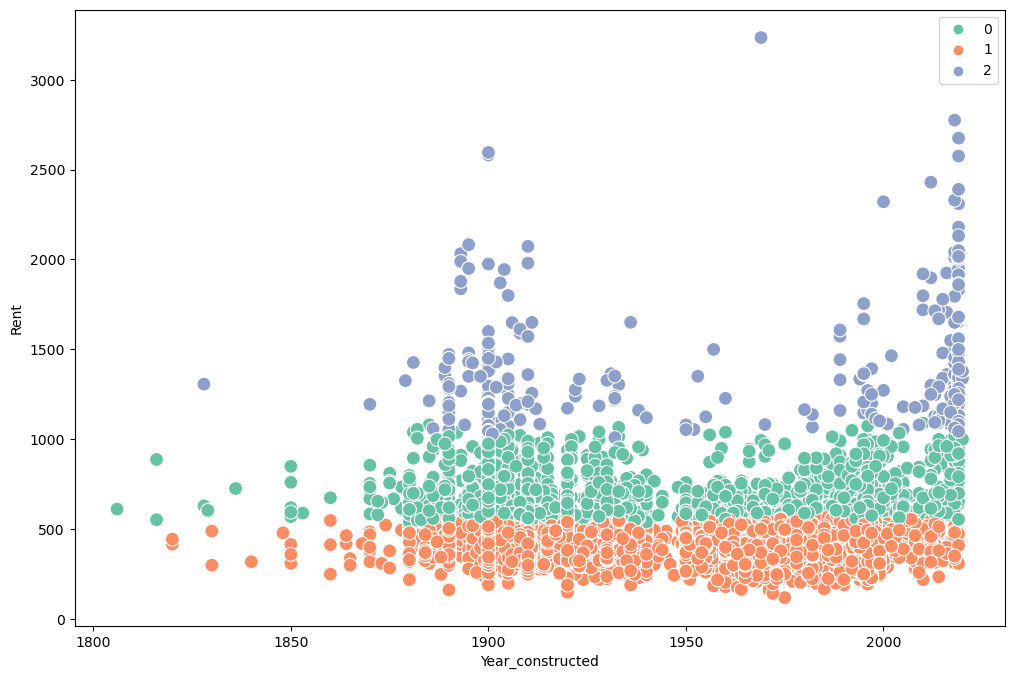

In [44]:
# Plot the clusters for the "Year_constructed" and "Total_Rent" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=Sachsen['Year_constructed'], y=Sachsen['Total_Rent'], hue=kmeans.labels_, s=100, palette='Set2')

ax.grid(False) 
plt.xlabel('Year_constructed') 
plt.ylabel('Rent') 
plt.show()

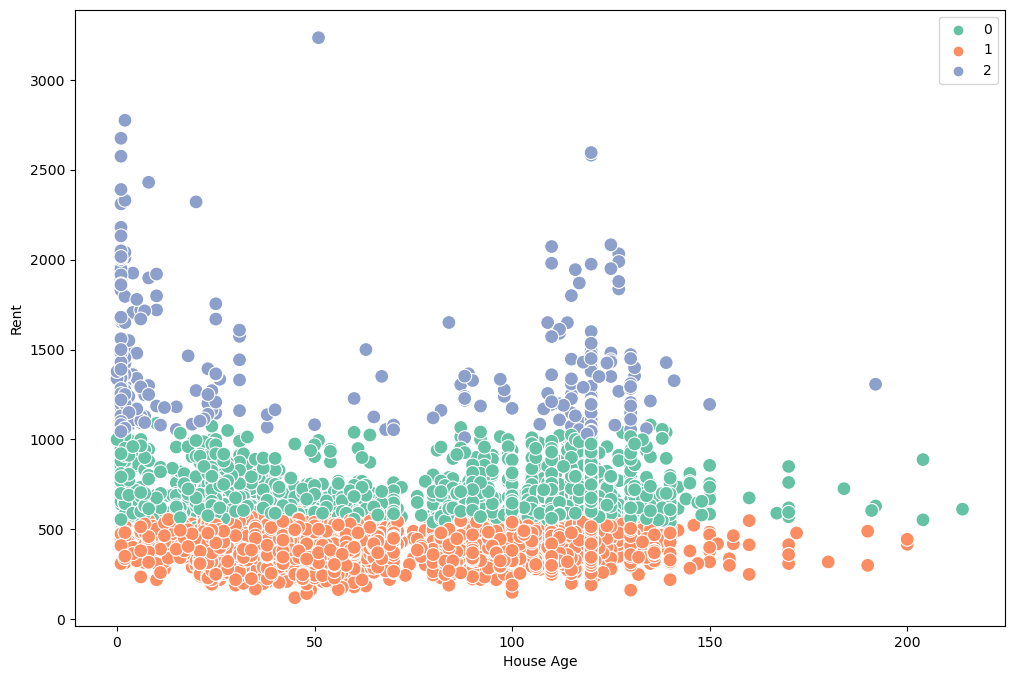

In [45]:
# Plot the clusters for the "House_Age" and "Total_Rent" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=Sachsen['House_Age'], y=Sachsen['Total_Rent'], hue=kmeans.labels_, s=100, palette='Set2')

ax.grid(False) 
plt.xlabel('House Age') 
plt.ylabel('Rent') 
plt.show()

In [46]:
df_new3.loc[df_new3['clusters'] == 0, 'clusters'] = 'Green'
df_new3.loc[df_new3['clusters'] == 1, 'clusters'] = 'Orange'
df_new3.loc[df_new3['clusters'] == 2, 'clusters'] = 'Blue'

1 (Orange) is the biggest bucket in Sachsen

In [47]:
df_new3.groupby('clusters').agg({'Floor':['mean', 'median'], 
                         'Rooms':['mean', 'median'], 
                         'Area(m2)':['mean', 'median'],
                         'Year_constructed':['mean', 'median'],
                         'House_Age':['mean', 'median'],
                         'Total_Rent':['mean', 'median']})

Floor            Rooms           Area(m2)           \
              mean median      mean median        mean   median   
clusters                                                          
Blue      2.363636    2.0  3.699675    4.0  124.700974  120.000   
Green     2.261009    2.0  2.950560    3.0   79.455925   76.705   
Orange    2.678729    2.0  2.417273    2.0   55.161057   56.910   

         Year_constructed          House_Age          Total_Rent           
                     mean  median       mean median         mean   median  
clusters                                                                   
Blue          1962.762987  1989.0  57.237013   31.0  1417.042565  1300.00  
Green         1944.569656  1930.0  75.430344   90.0   683.424079   648.00  
Orange        1961.246540  1970.0  58.753460   50.0   426.143739   432.28

#### Median rent for biggest cluster in Sachsen_Anhalt is 432.28 (half of that in Hamburg). Houses are fairly old with median house age as 50. The median house size for biggest cluster is 56.9.

### Analyzing the clusters from both Hamburg and Sachsen_Anhalt, it is deduced that the rent is dependent on Area as well as House Age